In [1]:
# import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import metrics

In [2]:
# set random seed 
np.random.seed(24)
# generate random data 
num_samples = 100 
feature_1 = np.random.uniform(-10, 10, num_samples) 
feature_2 = np.random.uniform(-10, 10, num_samples)

In [3]:
# Generate target variable based on a polynomial relationship with some added noise target
target = 0.5*feature_1**2 + 2 * feature_1*feature_2 - 3*feature_2 + 5 + np.random.normal(0, 5, num_samples)

# Combine into a DataFrame 
data_regression = pd.DataFrame({ 
    'Feature_1': feature_1, 
    'Feature_2': feature_2, 
    'Target': target 
    }) 

data_regression.head()

,Feature_1,Feature_2,Target
0,9.200346,5.383252,133.469543
1,3.990241,-0.508315,8.605029
2,9.997346,0.382263,56.362719
3,-5.598654,8.883861,-112.909787
4,-2.778873,2.870507,-20.687807


In [4]:
# split the data into training and testing sets with 80% training and 20% testing
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
#train_x, test_x, train_y, test_y = train_test_split(data_regression.drop('Target', axis=1), data_regression['Target'], test_size=0.2, random_state=24)
train_data, test_data = train_test_split(data_regression, test_size=0.2, random_state=24)   
train_x = train_data.drop('Target', axis=1) # Features: 'Feature 1 & 2'
train_y = train_data['Target']

test_x = test_data.drop('Target', axis=1) # Features: 'Feature 1 & 2'
test_y = test_data['Target']

In [5]:
from sklearn import preprocessing 
# Specifying the degree of the polynomial equation
nb_degree = 2
polynomial_features = preprocessing.PolynomialFeatures(degree = nb_degree)

# Transforming the train_x to fit the polynomial feature
train_x_poly = polynomial_features.fit_transform(train_x)

In [6]:
from sklearn import linear_model 

poly_regr = linear_model.LinearRegression()
poly_regr.fit(train_x_poly, train_y)

LinearRegression()

In [7]:
# Predicting the model:
test_x_poly = polynomial_features.fit_transform(test_x)
y_pred_poly = poly_regr.predict(test_x_poly)

# Calculating RMSE and R2 Score
rmse = np.sqrt(metrics.mean_squared_error(test_y, y_pred_poly))
r2_score_poly = metrics.r2_score(test_y, y_pred_poly)
print('Polynomial Regression RMSE: ', rmse)
print('Polynomial Regression R2: ', r2_score_poly)

Polynomial Regression RMSE:  3.5606444004193754
Polynomial Regression R2:  0.9962455158639573


In [8]:
mse = metrics.mean_squared_error(test_y, y_pred_poly)
print("Polynomial Regression Mean Squared Error:", mse)

Polynomial Regression Mean Squared Error: 12.678188546237852


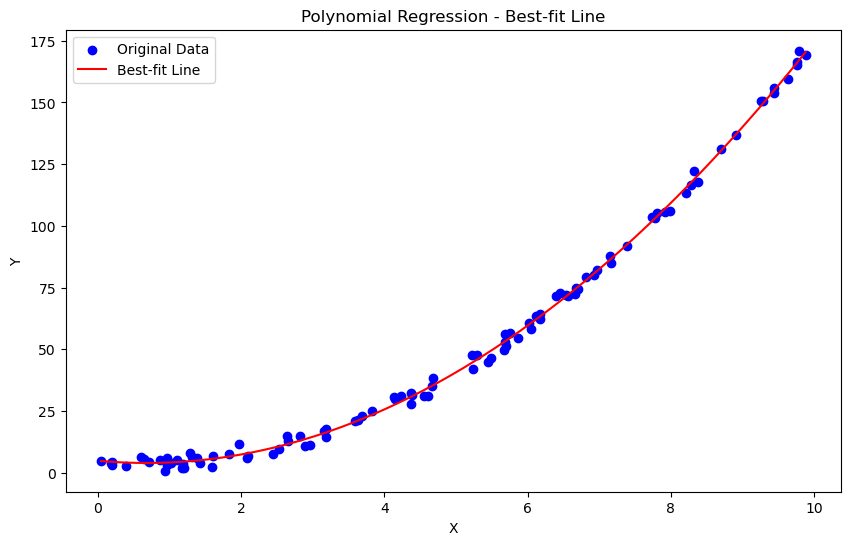

In [9]:
# Generate some random data for demonstration
np.random.seed(0)
x = np.random.rand(100, 1) * 10
y = 2 * x.squeeze() ** 2 - 3 * x.squeeze() + 5 + np.random.randn(100) * 2

# Create polynomial features (degree = 2)
poly_features = preprocessing.PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x)

# Train the polynomial regression model
poly_model = linear_model.LinearRegression()
poly_model.fit(X_poly, y)

# Generate x-values for plotting the best-fit line
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)

# Predict y-values using the trained polynomial regression model
y_values_pred = poly_model.predict(x_values_poly)

# Plotting the data points and the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x_values, y_values_pred, color='red', label='Best-fit Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression - Best-fit Line')
plt.legend()
plt.show()

In [ ]:
)